#Setup code
for importing libraries and reading the dataset  

In [21]:
# First I need to mount my drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# for the cartopy library in Colab
#DO NOT CHANGE THE CODE IN THIS BOX. WRITE YOUR CODE IN THE BOX BELOW.
#Run this snippet once to install cartopy correctly before writing your code.
#Cartopy and shapely don't play nice in Colab specifically. Need no-binary versions
# source: https://linuxtut.com/en/8f0d69169dc6ab753e08/
!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get update

!apt-get -qq build-dep python3-cartopy
!apt-get -qq remove python-shapely python3-shapely

!pip install --no-binary shapely shapely --force
!pip install --no-binary cartopy cartopy==0.17.0

deb-src http://archive.ubuntu.com/ubuntu/ bionic main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-backports main restricted universe multiverse
deb-src http://security.ubuntu.com/ubuntu/ bionic-security main restricted
deb-src http://security.ubuntu.com/ubuntu/ bionic-security universe
deb-src http://security.ubuntu.com/ubuntu/ bionic-security multiverse
deb-src https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/
deb-src https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/ /
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy import stats

In [24]:
filepath = 'drive/My Drive/data_folder/final_project_data.csv'
# to find the headers 
file_obj = open(filepath, 'r') # open the file 
for i in range(10): # read the first 10 lines in the file using a for loop
  line = file_obj.readline()
  print(i, line) # print the index and the line to find the number of headers more easily
file_obj.close() # close the file 
# the original csv file has two headers, the first row is the name of the variable and the second row is the unit corresponding to the variable
# Thus, here, I set the first row (row 0) as the header and skip the second row (row 1, the unit row) when reading the file
data = pd.read_csv(filepath, header = [0], skiprows = [1]) # use pandas to read the csv file

0 Accession,EXPOCODE,Cruise_flag,Cruise_ID,Observation_type,Profile_number,Station_ID,Cast_number,Niskin_ID,Niskin_flag,Sample_ID,Year_UTC,Month_UTC,Day_UTC,Time_UTC,Latitude,Longitude,Depth_bottom,Max_sample_depth,CTDPRES,Depth,CTDTEMP_ITS90,CTDTEMP_flag,CTDSAL_PSS78,CTDSAL_flag,Salinity_PSS78,Salinity_flag,recommended_Salinity_PSS78,recommended_Salinity_flag,CTDOXY,CTDOXY_flag,Oxygen,Oxygen_flag,recommended_Oxygen,recommended_Oxygen_flag,AOU,AOU_flag,DIC,DIC_flag,TALK,TALK_flag,pH_TS_measured,TEMP_pH,pH_flag,pH_TS_insitu_measured,pH_TS_insitu_calculated,fCO2_measured,TEMP_fCO2,fCO2_flag,fCO2_insitu_measured,fCO2_insitu_calculated,Carbonate_measured,TEMP_Carbonate,Carbonate_flag,Carbonate_insitu_measured,Carbonate_insitu_calculated,Aragonite,Calcite,Revelle_Factor,Silicate,Silicate_flag,Phosphate,Phosphate_flag,Nitrate,Nitrate_flag,Nitrite,Nitrite_flag,Nitrate_and_Nitrite,Nitrate_and_Nitrite_flag,recommended_Nitrate_and_Nitrite,recommended_Nitrate_and_Nitrite_flag,Ammonium,Ammonium_fl

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Initial Data Cleaning

In [25]:
# first display the data 
display(data)

,Accession,EXPOCODE,Cruise_flag,Cruise_ID,Observation_type,Profile_number,Station_ID,Cast_number,Niskin_ID,Niskin_flag,...,Nitrate,Nitrate_flag,Nitrite,Nitrite_flag,Nitrate_and_Nitrite,Nitrate_and_Nitrite_flag,recommended_Nitrate_and_Nitrite,recommended_Nitrate_and_Nitrite_flag,Ammonium,Ammonium_flag
0,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,1,2,...,25.8,2,0.19,2,25.99,2,25.99,2,0.14,2
1,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,2,2,...,25.6,2,0.20,2,25.80,2,25.80,2,0.13,2
2,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,3,2,...,24.0,2,0.15,2,24.15,2,24.15,2,0.41,2
3,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,4,2,...,22.6,2,0.17,2,22.77,2,22.77,2,-999.00,9
4,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,5,2,...,21.5,2,0.16,2,21.66,2,21.66,2,0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28201,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1,7,2,...,-999.0,9,-999.00,9,-999.00,9,-999.00,9,-999.00,9
28202,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1,8,2,...,-999.0,9,-999.00,9,-999.00,9,-999.00,9,-999.00,9
28203,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1,9,2,...,-999.0,9,-999.00,9,-999.00,9,-999.00,9,-999.00,9
28204,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1,10,2,...,-999.0,9,-999.00,9,-999.00,9,-999.00,9,-999.00,9


In [26]:
# I notice there are some missing data in my data set represented as -999.00
# Mask out the missing data using np.NaN (a placeholder)
data[data == -999.00] = np.NaN
# Then, display the data, better
display(data)

,Accession,EXPOCODE,Cruise_flag,Cruise_ID,Observation_type,Profile_number,Station_ID,Cast_number,Niskin_ID,Niskin_flag,...,Nitrate,Nitrate_flag,Nitrite,Nitrite_flag,Nitrate_and_Nitrite,Nitrate_and_Nitrite_flag,recommended_Nitrate_and_Nitrite,recommended_Nitrate_and_Nitrite_flag,Ammonium,Ammonium_flag
0,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5.0,1.0,2,...,25.8,2,0.19,2,25.99,2,25.99,2,0.14,2
1,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5.0,2.0,2,...,25.6,2,0.20,2,25.80,2,25.80,2,0.13,2
2,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5.0,3.0,2,...,24.0,2,0.15,2,24.15,2,24.15,2,0.41,2
3,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5.0,4.0,2,...,22.6,2,0.17,2,22.77,2,22.77,2,NaN,9
4,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5.0,5.0,2,...,21.5,2,0.16,2,21.66,2,21.66,2,0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28201,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1.0,7.0,2,...,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9
28202,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1.0,8.0,2,...,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9
28203,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1.0,9.0,2,...,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9
28204,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1.0,10.0,2,...,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9


Here, I formed a new dataset with all necessary variables, dropped the nan values in the new dataset, combined the 3 "time columns" into one new column called 'date', and changed them into datetime objects. 

In [27]:
# The original dataset is so messy with a lot of variables I won't be used for this analysis.
# Therefore, here, I form a new dataset called gen_use_data, which contains all the variables I'll be used for later analysis and clean it
# general trend of ocean acidification
gen_use_data = data[['Cruise_ID', 'Year_UTC', 'Month_UTC', 'Day_UTC', 'Latitude', 'Longitude', 'pH_TS_insitu_calculated']] # select columns for plotting
gen_use_data = gen_use_data.dropna() # drop the missing value
# create a new column called "date" to store the date information into datetime objects 
gen_use_data['date'] = gen_use_data['Year_UTC'].astype('str') + '-' + gen_use_data['Month_UTC'].astype('str') + '-' + gen_use_data['Day_UTC'].astype('str') # combine the three columns together to 1 new column with recording date in string
gen_use_data['date'] = pd.to_datetime(gen_use_data['date']) # change the recording date from string to datetime object using the pd.to_datetime() function
display(gen_use_data) # display the data to check

,Cruise_ID,Year_UTC,Month_UTC,Day_UTC,Latitude,Longitude,pH_TS_insitu_calculated,date
0,HLY0802,2008,4,1,56.5090,-170.8147,7.9743,2008-04-01
1,HLY0802,2008,4,1,56.5090,-170.8147,7.9977,2008-04-01
2,HLY0802,2008,4,1,56.5090,-170.8147,8.0398,2008-04-01
3,HLY0802,2008,4,1,56.5090,-170.8147,8.0659,2008-04-01
4,HLY0802,2008,4,1,56.5090,-170.8147,8.0661,2008-04-01
...,...,...,...,...,...,...,...,...
28198,SH1709,2017,9,28,44.1977,-124.9827,7.8849,2017-09-28
28200,SH1709,2017,9,28,44.1973,-124.9832,7.9567,2017-09-28
28202,SH1709,2017,9,28,44.1970,-124.9837,7.9997,2017-09-28
28203,SH1709,2017,9,28,44.1970,-124.9838,8.0176,2017-09-28


#Actual Plotting Part

##Plot 1:
First, I'd like to know where my data is located and the general pH in each location 

Here, I want to explain the color I choose for plotting. I purposely chose the reverse jet package because I refer to the results of the pH test paper. Typically, the test paper will show a warm color if the liquid is acidic and a cool color if the liquid is alkaline. As the acidity rises, the color of the test paper result will gradually turn red, and as the alkalinity rises, it will gradually turn blue. The reverse jet package's color variation coincides with this feature, which becomes the reason I choose to use this specific package for plotting. 

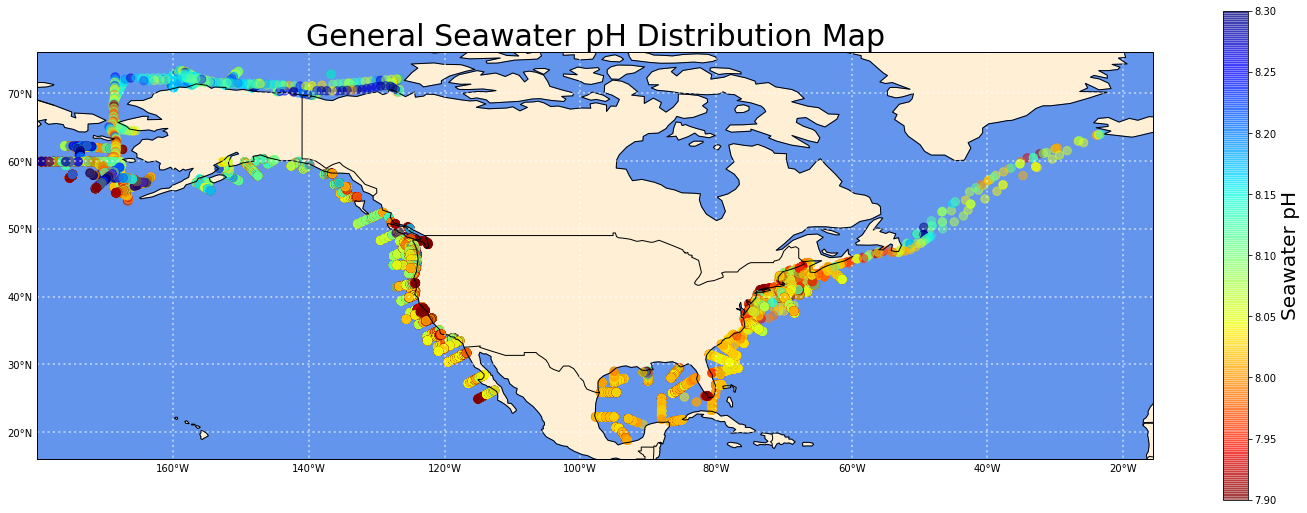

In [28]:
# plot the location of each of my data
fig = plt.figure(figsize = (25, 9)) # make a figure 
ax = plt.axes(projection = ccrs.PlateCarree()) # make the platecarree projection

ax.coastlines(resolution = '110m', color = 'k') # add the coastlines 

ax.add_feature(cfeature.LAND, color = 'papayawhip') # add the land feature
ax.add_feature(cfeature.OCEAN, color = 'cornflowerblue') # add the ocean feature
ax.add_feature(cfeature.BORDERS, edgecolor = 'k') # add the broaders feature 

# add gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True,
                  linewidth = 2, color = 'white', alpha = 0.5, linestyle = ':')
# make the labels look better 
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# first save columns for ploting 
long_col = data['Longitude']
lat_col = data['Latitude']
# then, plot the overall data in scatter with color corresponding to pH
gen_scat = plt.scatter(long_col, lat_col, s = 70, c = data['pH_TS_insitu_calculated'], cmap = 'jet_r', 
                       alpha=0.5, transform = ccrs.PlateCarree())
# add a colorbar to the plot
c = plt.colorbar(gen_scat, ax = ax)
plt.clim(7.9, 8.3) # set the limit into 7.9 to 8.3
c.set_label("Seawater pH", fontsize=20) # add a label to the colorbar
# label the title 
ax.set_title('General Seawater pH Distribution Map', fontsize=30);

Main takeaways from plot 1:

From the graph we can see two phenomena: 

1) the higher the latitude, the higher the pH of seawater; 

2) the closer to the coastline, the lower the pH of seawater (the more serious ocean acidification). 

(More detailed analysis will be shown in plot 3)

##Plot2:
Second, I'd like to know the comparison of seawater pH on the west coast by year.

I sliced the dataset to get only the west coast data for 2012 and 2017 (because these years contain pH data for the west coast, and for some other years, there aren't a lot of data for the west coast).

Finally, I made the plot.

In [29]:
# sliced the dataset to get the west coast data for 2012 and 2017 
# to get all year data for the west coast and save it in data_west
data_west = gen_use_data[(gen_use_data['Latitude'] <= 52) & (gen_use_data['Latitude'] >= 40) & (gen_use_data['Longitude'] >= -130) & (gen_use_data['Longitude'] <= -90)]
# to get the west coast data for 2012
data_west_2012 = data_west[data_west['Year_UTC'] == 2012]
# to get the west coast data for 2012
data_west_2017 = data_west[data_west['Year_UTC'] == 2017]

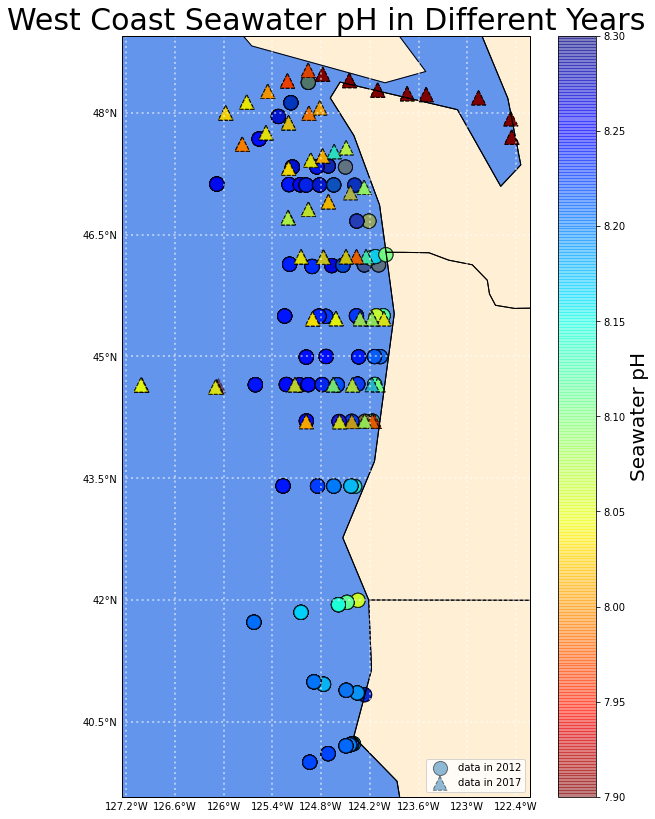

In [30]:
# plot the West Coast Seawater pH in Different Years 
fig = plt.figure(figsize = (10, 14)) # make a figure 
ax = plt.axes(projection = ccrs.PlateCarree()) # make the platecarree projection

ax.coastlines(resolution = '110m', color = 'k') # add the coastlines 

ax.add_feature(cfeature.LAND, color = 'papayawhip') # add the land feature
ax.add_feature(cfeature.OCEAN, color = 'cornflowerblue') # add the ocean feature
ax.add_feature(cfeature.BORDERS, edgecolor = 'k') # add the broaders feature 
ax.add_feature(cfeature.STATES, edgecolor = 'k') # add the states feature

# add gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True,
                  linewidth = 2, color = 'white', alpha = 0.5, linestyle = ':')
# make the labels look better 
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# first save columns for ploting for year 2012
long_col_2012 = data_west_2012['Longitude']
lat_col_2012 = data_west_2012['Latitude']
# then, plot the 2012 data in scatter with shape in circle and  color corresponding to pH
west_scat_2012 = plt.scatter(long_col_2012, lat_col_2012, s = 200, c = data_west_2012['pH_TS_insitu_calculated'], alpha=0.5,
                       cmap = 'jet_r', ls = '-', lw = 1, edgecolor = 'k', transform = ccrs.PlateCarree(), label = 'data in 2012')

# first save columns for ploting for year 2017
long_col_2017 = data_west_2017['Longitude']
lat_col_2017 = data_west_2017['Latitude']
# then, plot the 2017 data in scatter with shape in triangle and color corresponding to pH
west_scat_2017 = plt.scatter(long_col_2017, lat_col_2017, s = 200, c = data_west_2017['pH_TS_insitu_calculated'], alpha=0.5,
                       cmap = 'jet_r', marker ="^", ls = '--', lw = 1, edgecolor = 'k', transform = ccrs.PlateCarree(), label = 'data in 2017')

# add a colorbar to the plot
c = plt.colorbar(ax = ax)
plt.clim(7.9, 8.3) # set the limit into 7.9 to 8.3
c.set_label("Seawater pH", fontsize=20) # add a label to the colorbar

# add the legend in the plot showing the shape difference between 2012 and 2017
plt.legend(loc='lower right')

# label the title 
ax.set_title('West Coast Seawater pH in Different Years', fontsize=30);

Main takeaways from plot 2:

We can see that the water on the west coast has dropped by about 0.15 pH in just 5 years. This indicates that ocean acidification on the west coast is indeed a very serious problem and deserves everyone’s  attention. 

## Plot3:
Here, I made some plots of the arctic oceans to show the general trend in pH changes in seawater near the coast.

Here, I'm particularly interested in data in the Arctic oceans because it has a very clear trend.

All data from the Arctic oceans recorded from the cruises start with "HLY" in their IDs. First, I formed a new dataset that only contains data from the "HLY" cruises.

Then, I made a plot to see the distribution of the data and the pH in each location.

Finally, I made the two scatter plots with linear regression. showing the relation in pH and latitude and pH and longitude separately.

In [31]:
# Have a look at all the names of Cruise_ID
all_id = list(gen_use_data['Cruise_ID'].unique())
print(sorted(all_id))
# here, I found there are 6 "HLY" family ships' data
# Here, I used the "or" statements to form a dataset called "filter", which contains data only from the "HLY" family
m0802 = gen_use_data['Cruise_ID'] == 'HLY0802'
m0803 = gen_use_data['Cruise_ID'] == 'HLY0803'
m0902 = gen_use_data['Cruise_ID'] == 'HLY0902'
m1003 = gen_use_data['Cruise_ID'] == 'HLY1003'
m1203 = gen_use_data['Cruise_ID'] == 'HLY1203'
m1303 = gen_use_data['Cruise_ID'] == 'HLY1303'
filter = gen_use_data[m0802 | m0803 | m0902 | m1003 | m1203 | m1303]

['DE1202', 'ECOA1', 'ECOA2', 'EX1403', 'GOMECC1', 'GOMECC2', 'GOMECC3', 'GU1302', 'GU1305', 'GU1401 Leg2', 'GU1506 Leg2', 'GU1608 Leg1', 'GU1608 Leg2', 'GU1701 Leg1', 'GU1701 Leg2', 'GU1702', 'GU1706', 'GU1804', 'HB1202', 'HB1301 Leg1', 'HB1301 Leg2', 'HB1405 Leg1', 'HB1405 Leg2', 'HB1405 Leg4', 'HB1502', 'HB1701', 'HB1803', 'HLY0802', 'HLY0803', 'HLY0902', 'HLY1003', 'HLY1203', 'HLY1303', 'KN195', 'MF0904', 'PC1405', 'PC1604', 'PC1609', 'RB1504', 'S11802', 'SH1709', 'SKO0410', 'SKO0414', 'SKO0510', 'SKO0604', 'SKO0611', 'SKO1406', 'Selfoss846', 'TN249-10', 'WCOA2007', 'WCOA2011', 'WCOA2012', 'WCOA2013', 'WCOA2016', 'WS1418', 'WS15264']


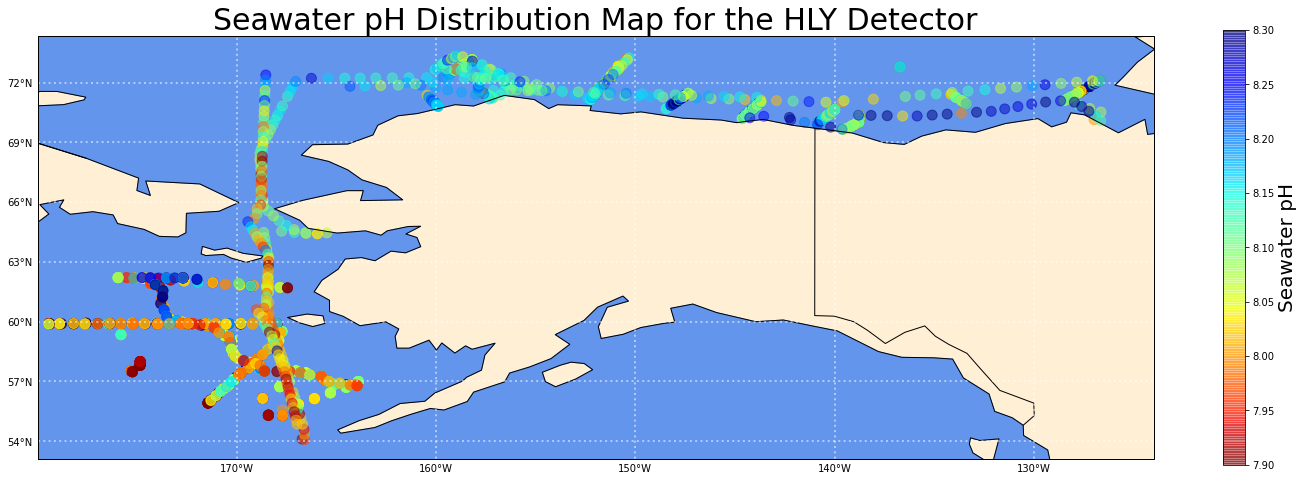

In [32]:
# plot the location of each of my filtered data
fig = plt.figure(figsize = (25, 8)) # make a figure 
ax = plt.axes(projection = ccrs.PlateCarree()) # make the platecarree projection

ax.coastlines(resolution = '110m', color = 'k') # add the coastlines 

ax.add_feature(cfeature.LAND, color = 'papayawhip') # add the land feature
ax.add_feature(cfeature.OCEAN, color = 'cornflowerblue') # add the ocean feature
ax.add_feature(cfeature.BORDERS, edgecolor = 'k') # add the broaders feature 

# add gridlines
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True,
                  linewidth = 2, color = 'white', alpha = 0.5, linestyle = ':')
# make the labels look better 
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# first save columns for plotting 
hly_long_col = filter['Longitude']
hly_lat_col = filter['Latitude']
# then, plot in scatter
hly_gen_scat = plt.scatter(hly_long_col, hly_lat_col, s = 100, c = filter['pH_TS_insitu_calculated'], 
                           alpha = 0.5, cmap = 'jet_r', transform = ccrs.PlateCarree())
# add a colorbar 
c = plt.colorbar(hly_gen_scat, ax = ax)
plt.clim(7.9, 8.3) # set the limit into 7.9 to 8.3
c.set_label("Seawater pH", fontsize=20) # add a label to the colorbar

# label the title
ax.set_title('Seawater pH Distribution Map for the HLY Detector', fontsize=30);

Below, I made the 2 scatter plots with linear regression.

To see the trend in pH versus latitude, ideally, I should determine a specific longitude and then analyze the pH data in different latitudes at that specific longitude. However, since my data is based on measurements in the "HLY" cruises, which can't stay at a precise longitude while driving, here, I took data from a small range of longitudes (165 °W to 170 °W). In order to mitigate the effect of changes in seawater acidity at different times and thus focus only on the effect of latitude on seawater pH, here I have averaged the data for the same longitude by using groupby().

Similarly, to see the trend in pH versus longitude, I took a small range of latitudes (61 °N to 63 °N). In order to mitigate the effect of changes in seawater acidity at different times and thus focus only on the effect of longitude on seawater pH, here I have averaged the data for the same latitude by using groupby().

,Cruise_ID,Year_UTC,Month_UTC,Day_UTC,Latitude,Longitude,pH_TS_insitu_calculated,date
23,HLY0802,2008,4,1,57.310,-169.9182,8.0680,2008-04-01
24,HLY0802,2008,4,1,57.310,-169.9182,8.0688,2008-04-01
25,HLY0802,2008,4,1,57.310,-169.9182,8.0693,2008-04-01
26,HLY0802,2008,4,1,57.310,-169.9182,8.0696,2008-04-01
27,HLY0802,2008,4,1,57.310,-169.9182,8.0701,2008-04-01
...,...,...,...,...,...,...,...,...
5767,HLY1303,2013,10,30,55.691,-167.1720,8.0141,2013-10-30
5768,HLY1303,2013,10,30,55.481,-167.1220,7.9066,2013-10-30
5769,HLY1303,2013,10,30,55.274,-167.0710,7.9257,2013-10-30
5770,HLY1303,2013,10,30,55.060,-167.0200,8.0129,2013-10-30


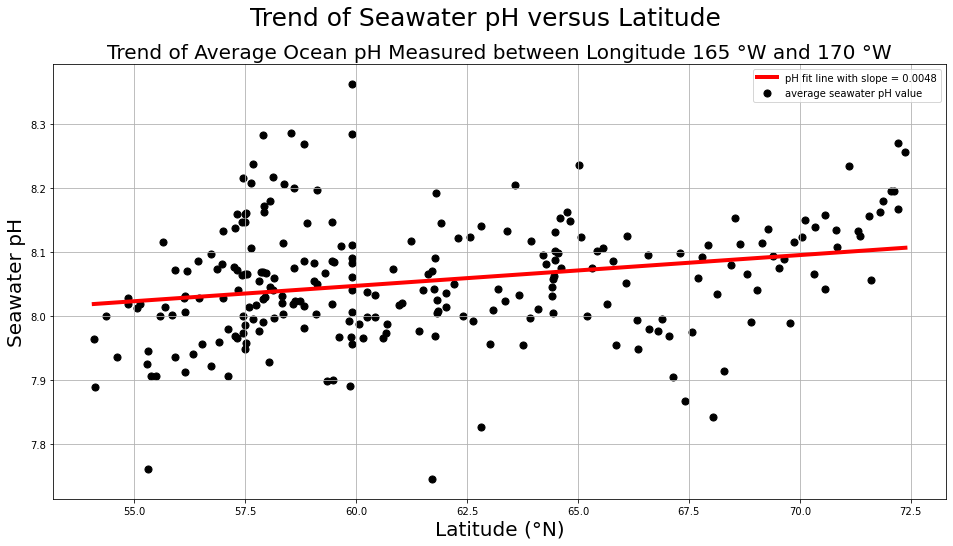

In [33]:
# take data from a small range of longitudes (165 °W to 170 °W)
data_lat = filter[(filter['Longitude'] >= -170) & (filter['Longitude'] <= -165)]
display(data_lat)  # display to make sure I got some data in this range 
# average the data for the same latitude by using groupby() to mitigate the effect of changes in seawater acidity at different times
lat_1 = data_lat.groupby('Latitude')['pH_TS_insitu_calculated'].mean()
lat_1 = lat_1.reset_index(name = 'mean') # give the grouped mean a name

# calculate the necessary statics for plotting the linear regression and save them as variables 
lat_slope, lat_intercept, lat_rvalue, lat_pvalue, lat_sterr = stats.linregress(lat_1['Latitude'], lat_1['mean'])

# make a figure 
plt.subplots(figsize=(16,8))
# make the scatter points of seawater pH from 165 °W to 170 °W
plt.scatter(lat_1['Latitude'],lat_1['mean'],color="k",s=50) 
# create the math function for the regression line
lat_fit = lat_1['Latitude'] * lat_slope + lat_intercept
# plot the linear regression line in red 
plt.plot(lat_1['Latitude'], lat_fit, '-', c='r', lw = 4)
# add lables for the plot
plt.suptitle("Trend of Seawater pH versus Latitude", fontsize=25) # add title
plt.title('Trend of Average Ocean pH Measured between Longitude 165 °W and 170 °W', fontsize=20) # add subtitle
plt.xlabel('Latitude (°N)', fontsize=20)
plt.ylabel('Seawater pH', fontsize=20)
plt.grid() # add grids to the plot
# add a legend to the plot telling people the points is the average seawater pH value and the red line is the linear regression line of the pH with the slope 
plt.legend(["pH fit line with slope = " + str(lat_slope.round(4)), "average seawater pH value"]);

Main takeaways from plot 3-1:

The higher the latitude, the higher the pH of the seawater (more alkaline). 

,Cruise_ID,Year_UTC,Month_UTC,Day_UTC,Latitude,Longitude,pH_TS_insitu_calculated,date
275,HLY0802,2008,4,11,62.2198,-175.9375,7.9884,2008-04-11
277,HLY0802,2008,4,11,62.2198,-175.9375,8.0402,2008-04-11
279,HLY0802,2008,4,11,62.2198,-175.9375,8.0625,2008-04-11
281,HLY0802,2008,4,11,62.2198,-175.9375,8.0545,2008-04-11
282,HLY0802,2008,4,11,62.2198,-175.9375,8.0425,2008-04-11
...,...,...,...,...,...,...,...,...
5735,HLY1303,2013,10,28,61.8210,-168.4760,8.0250,2013-10-28
5736,HLY1303,2013,10,28,61.6230,-168.4870,8.0656,2013-10-28
5737,HLY1303,2013,10,28,61.4270,-168.4990,7.9774,2013-10-28
5738,HLY1303,2013,10,28,61.2320,-168.5100,8.1170,2013-10-28


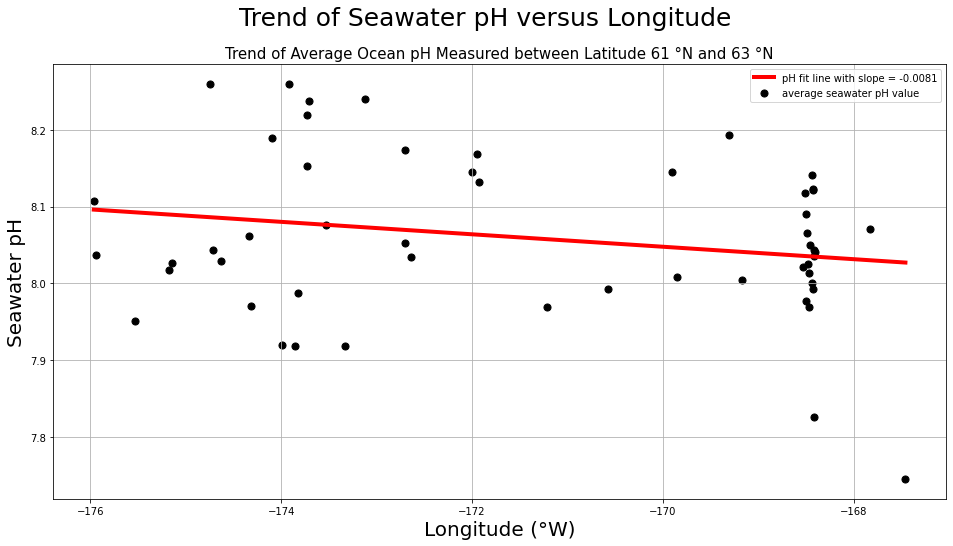

In [34]:
# take data from a small range of longitudes (61 °N to 63 °N)
data_lon = filter[(filter['Latitude'] >= 61) & (filter['Latitude'] <= 63)]
display(data_lon)  # display to make sure I got some data in this range 
# average the data for the same longitdue by using groupby() to mitigate the effect of changes in seawater acidity at different times
lon_1 = data_lon.groupby('Longitude')['pH_TS_insitu_calculated'].mean()
lon_1 = lon_1.reset_index(name = 'mean') # give the grouped mean a name

# calculate the necessary statics for plotting the linear regression and save them as variables
lon_slope, lon_intercept, lon_rvalue, lon_pvalue, lon_sterr = stats.linregress(lon_1['Longitude'], lon_1['mean'])

# make a figure 
plt.subplots(figsize=(16,8))
# make the scatter points of seawater pH from 61 °N to 63 °N
plt.scatter(lon_1['Longitude'],lon_1['mean'],color="k",s=50) 
# create the math function for the regression line
lon_fit = lon_1['Longitude'] * lon_slope + lon_intercept
# plot the linear regression line in red 
plt.plot(lon_1['Longitude'], lon_fit, '-', c='r', lw = 4)
# add lables for the plot
plt.suptitle("Trend of Seawater pH versus Longitude", fontsize=25) # add title
plt.title('Trend of Average Ocean pH Measured between Latitude 61 °N and 63 °N', fontsize=15) # add subtitle
plt.xlabel('Longitude (°W)', fontsize=20)
plt.ylabel('Seawater pH', fontsize=20)
plt.grid() # add grids to the plot
# add a legend to the plot telling people the points is the average seawater pH value and the red line is the linear regression line of the pH with the slope 
plt.legend(["pH fit line with slope = " + str(lon_slope.round(4)), "average seawater pH value"]);

Main takeaways from plot 3-2:

The closer to the mainland, the lower the pH of seawater (more acidic).

## Plot 4:
Plots that I generated at starting points, using for showing the _challenge_ in the presentation slides

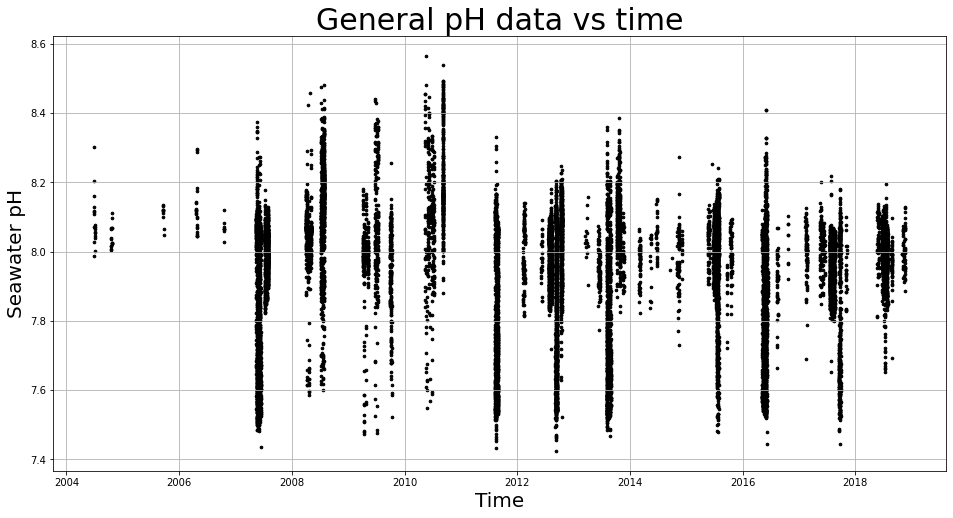

In [35]:
# plot for showing the overall trend of seawater pH vs time 
# make a figure
plt.subplots(figsize=(16,8))
# plot the scatter points about the seawater pH by time 
plt.scatter(gen_use_data['date'],gen_use_data['pH_TS_insitu_calculated'],color="k",s=7) 
# label the plot
plt.title('General pH data vs time', fontsize=30)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Seawater pH', fontsize=20)
# add grids to the plot
plt.grid()

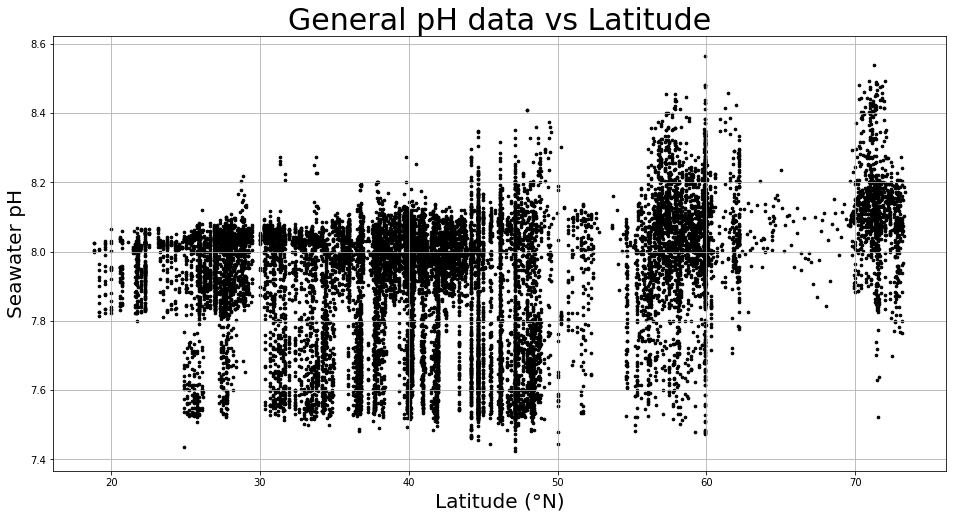

In [36]:
# plot for showing the overall trend of seawater pH vs latitude
# make a figure
plt.subplots(figsize=(16,8))
# plot the scatter points about the seawater pH by latitude 
plt.scatter(gen_use_data['Latitude'],gen_use_data['pH_TS_insitu_calculated'],color="k",s=7) 
# label the plot
plt.title('General pH data vs Latitude', fontsize=30)
plt.xlabel('Latitude (°N)', fontsize=20)
plt.ylabel('Seawater pH', fontsize=20)
# add grids to the plot
plt.grid()

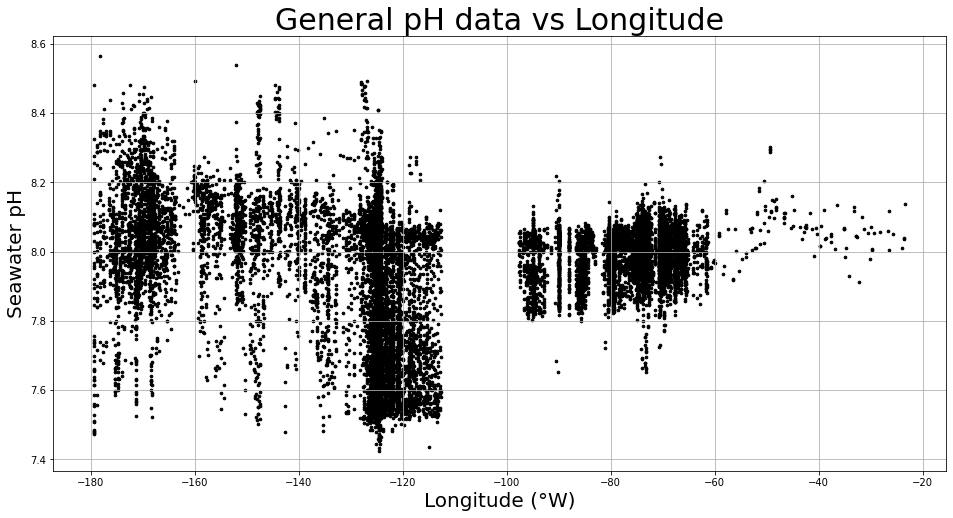

In [37]:
# plot for showing the overall trend of seawater pH vs longitude
# make a figure
plt.subplots(figsize=(16,8))
# plot the scatter points about the seawater pH by longitude
plt.scatter(gen_use_data['Longitude'],gen_use_data['pH_TS_insitu_calculated'],color="k",s=7) 
# label the plot
plt.title('General pH data vs Longitude', fontsize=30)
plt.xlabel('Longitude (°W)', fontsize=20)
plt.ylabel('Seawater pH', fontsize=20)
# add grids to the plot
plt.grid()